In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from torch import nn
import torch

In [2]:
train_data = datasets.FashionMNIST(root='image', 
                                    train=True, 
                                    download=True,
                                    transform=ToTensor()
)
test_data = datasets.FashionMNIST(root='image', 
                                    train=False, 
                                    download=True, 
                                    transform=ToTensor()
)

In [3]:
img, lab = train_data[0]
class_names = train_data.classes

class_names[lab], img.shape, img.permute(1, 2, 0).shape
#matplotlib在畫圖時，希望我們顏色通道的維度，放在最後一個
#藉由permute可改變維度，想要把新的第零個維度，設定成舊的第幾個維度，就把它寫在第一個參數

('Ankle boot', torch.Size([1, 28, 28]), torch.Size([28, 28, 1]))

In [4]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

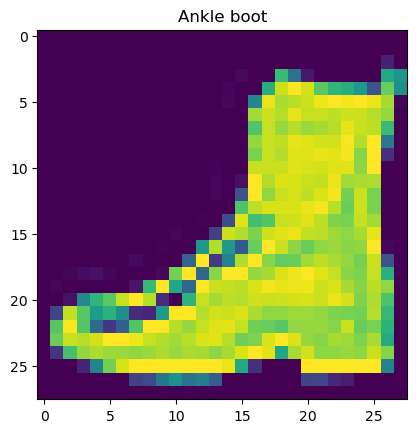

In [5]:
random_idx = random.randint(0, len(train_data)-1)
img, lab = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[lab])

In [6]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, 
                                batch_size=BATCH_SIZE,
                                shuffle=True)
test_dataloader = DataLoader(test_data, 
                                batch_size=BATCH_SIZE,
                                shuffle=False)
len(train_dataloader), len(test_dataloader)

#DataLoader將對資料進行分批處理
#shuffle則進行打亂的動作

(1875, 313)

In [7]:
1875*32, 313*32

(60000, 10016)

In [8]:
#DataLoader允許使用疊代
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])

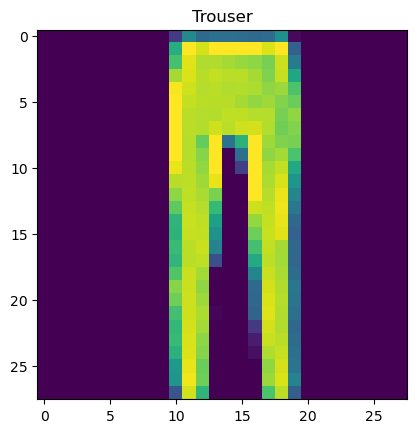

In [9]:
random_idx = random.randint(0, len(x_first_batch)-1)
img, lab = x_first_batch[random_idx], y_first_batch[random_idx]

plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[lab])
x_first_batch[random_idx].shape

In [10]:
x_first_batch[0].shape

torch.Size([1, 28, 28])

In [11]:
#當圖片要進行模型訓練時要先進行攤平的動作
flatten = nn.Flatten(start_dim=0, end_dim=-1)#-1代表最後一個
flatten(x_first_batch[0]).shape

torch.Size([784])

In [12]:
class ImageClassificationModel(nn.Module):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(start_dim=1, end_dim=-1), 
            nn.Linear(in_features=input_shape, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [13]:
#通常在進行訓練時會一個一個batch訓練
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
torch.manual_seed(87)
model = ImageClassificationModel(28*28, 10)
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
                      [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
                      [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
                      ...,
                      [ 0.0022,  0.0250, -0.0206,  ...,  0.0313,  0.0052, -0.0215],
                      [ 0.0283,  0.0323,  0.0323,  ...,  0.0146, -0.0040,  0.0086],
                      [ 0.0243,  0.0077, -0.0030,  ...,  0.0065,  0.0205,  0.0202]])),
             ('layer_stack.1.bias',
              tensor([ 0.0099,  0.0330,  0.0156, -0.0259,  0.0210, -0.0344, -0.0287,  0.0027,
                      -0.0189,  0.0245]))])

In [15]:
cost_fn = nn.CrossEntropyLoss()
#CrossEntropy不但會幫我們計算cost，還可以自動使用softmax，所以定義模型時，就不需要使用softmax
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.3343, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0313,  0.0052, -0.0215],
        [ 0.0283,  0.0323,  0.0323,  ...,  0.0146, -0.0040,  0.0086],
        [ 0.0243,  0.0077, -0.0030,  ...,  0.0065,  0.0205,  0.0202]])), ('layer_stack.1.bias', tensor([ 0.0099,  0.0330,  0.0156, -0.0259,  0.0210, -0.0344, -0.0287,  0.0027,
        -0.0189,  0.0245]))])
tensor(2.2877, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0323, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0205,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0

In [16]:
def accuracy_fn(y_pred, y_true):
    correct_num = (y_pred==y_true).sum()
    acc = correct_num / len(y_pred) * 100

    return acc

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [18]:
def train_step(dataloader, model, cost_fn, optimizer, device):
    train_cost = 0
    train_acc = 0
    for batch, (x, y) in enumerate(dataloader):# 每個batch分別訓練
        x = x.to(device)
        y = y.to(device)

        model.train()

        y_pred = model(x)

        cost = cost_fn(y_pred, y)

        train_cost += cost
        train_acc +=accuracy_fn(y_pred.argmax(dim=1), y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

    train_cost /= len(dataloader)#train_cost = train_cost / len(train_dataloader)
    train_acc /= len(dataloader)#做平均
    print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")


def test_step(dataloader, model, cost_fn, device):
    test_cost = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)

            test_pred = model(x)

            test_cost += cost_fn(test_pred, y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        test_cost /= len(dataloader)
        test_acc /= len(dataloader)#做平均

    print(f"Test Cost: {test_cost:.4f}, Test Acc: {test_acc:.2f}\n")

In [19]:
epochs = 10

for epoch in range(epochs):
    print(f'Epoch: {epoch}\n-------------')

    train_step(train_dataloader, model, cost_fn, optimizer, device)
    test_step(test_dataloader, model, cost_fn, device)

Epoch: 0
-------------

Train Cost: 0.8187, Train Acc: 74.44
Test Cost: 0.6519, Test Acc: 78.04

Epoch: 1
-------------

Train Cost: 0.5891, Train Acc: 80.89
Test Cost: 0.5801, Test Acc: 80.83

Epoch: 2
-------------

Train Cost: 0.5400, Train Acc: 82.37
Test Cost: 0.5481, Test Acc: 81.49

Epoch: 3
-------------

Train Cost: 0.5138, Train Acc: 83.01
Test Cost: 0.5290, Test Acc: 82.09

Epoch: 4
-------------

Train Cost: 0.4966, Train Acc: 83.39
Test Cost: 0.5172, Test Acc: 82.48

Epoch: 5
-------------

Train Cost: 0.4839, Train Acc: 83.73
Test Cost: 0.5091, Test Acc: 82.54

Epoch: 6
-------------

Train Cost: 0.4740, Train Acc: 84.01
Test Cost: 0.5000, Test Acc: 82.89

Epoch: 7
-------------

Train Cost: 0.4667, Train Acc: 84.32
Test Cost: 0.4935, Test Acc: 82.98

Epoch: 8
-------------

Train Cost: 0.4603, Train Acc: 84.42
Test Cost: 0.4900, Test Acc: 83.04

Epoch: 9
-------------

Train Cost: 0.4549, Train Acc: 84.64
Test Cost: 0.4838, Test Acc: 83.31



In [20]:
class ImageClassificationModel2(nn.Module):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(start_dim=1, end_dim=-1), 
            nn.Linear(in_features=input_shape, out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)

In [21]:
model_2 = ImageClassificationModel2(28*28, 10)
model_2.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [22]:
epochs = 10

for epoch in range(epochs):
    print(f'Epoch: {epoch}\n-------------')

    train_step(train_dataloader, model_2, cost_fn, optimizer, device)
    test_step(test_dataloader, model_2, cost_fn, device)

Epoch: 0
-------------

Train Cost: 1.5730, Train Acc: 41.95
Test Cost: 0.8514, Test Acc: 64.86

Epoch: 1
-------------

Train Cost: 0.7210, Train Acc: 73.08
Test Cost: 0.6569, Test Acc: 76.76

Epoch: 2
-------------

Train Cost: 0.6000, Train Acc: 78.93
Test Cost: 0.5971, Test Acc: 78.39

Epoch: 3
-------------

Train Cost: 0.5554, Train Acc: 80.64
Test Cost: 0.5753, Test Acc: 80.03

Epoch: 4
-------------

Train Cost: 0.5306, Train Acc: 81.69
Test Cost: 0.5627, Test Acc: 80.42

Epoch: 5
-------------

Train Cost: 0.5168, Train Acc: 82.14
Test Cost: 0.5629, Test Acc: 80.46

Epoch: 6
-------------

Train Cost: 0.5062, Train Acc: 82.41
Test Cost: 0.5232, Test Acc: 81.74

Epoch: 7
-------------

Train Cost: 0.4970, Train Acc: 82.82
Test Cost: 0.5377, Test Acc: 80.72

Epoch: 8
-------------

Train Cost: 0.4901, Train Acc: 83.01
Test Cost: 0.5230, Test Acc: 81.88

Epoch: 9
-------------

Train Cost: 0.4853, Train Acc: 83.07
Test Cost: 0.5138, Test Acc: 82.26



### 進行模型評估

In [23]:
def eval_model(dataloader, model, cost_fn, accuracy_fn, device):
    test_cost = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)

            test_pred = model(x)

            test_cost += cost_fn(test_pred, y)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        test_cost /= len(dataloader)
        test_acc /= len(dataloader)#做平均

    return {
        "model_name": model.__class__.__name__,
        "model_cost": test_cost.item(),
        "model_acc": test_acc.item()
        #item幫我們把tensor格式中的單一數字取出來
    }

In [24]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_1_result

{'model_name': 'ImageClassificationModel',
 'model_cost': 0.4837796986103058,
 'model_acc': 83.30670928955078}

In [25]:
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_2_result

{'model_name': 'ImageClassificationModel2',
 'model_cost': 0.5137757658958435,
 'model_acc': 82.25838470458984}

### Underfitting(欠擬合)
特性: 與訓練、測試資料的吻合程度有一段差距                                          
解決方法: 
1. 增加學習率
2. 訓練久一點
3. 增加模型複雜度
### Overfitting(過擬合)
特性: 在訓練集上表現很好，但在測試集上表現欠佳                                       
解決方法: 
1. 收集更多資料
2. 簡化模型
3. 提早停止訓練

### 利用Convolutional Layer 卷積層，來搭建Convolutional Neural Network

In [26]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5*5, stride=1, padding=1)
conv_output = conv_layer(x_first_batch[0])
print(conv_output.shape)

maxpool = nn.MaxPool2d(kernel_size=2*2, stride=2, padding=0)
maxpool(conv_output).shape

torch.Size([8, 6, 6])


torch.Size([8, 2, 2])

In [27]:
class ImageClassificationModel3(nn.Module):
    def __init__(self, input_shape, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                        out_channels=8, 
                        kernel_size=(3, 3), 
                        stride=1, 
                        padding=1
            ),
            nn.ReLU(), 
            nn.Conv2d(in_channels=8, 
                        out_channels=8, 
                        kernel_size=(3, 3), 
                        stride=1,
                        padding=1
            ),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2, 2), 
                            stride=2, 
                            padding=0
            )
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=8, 
                        out_channels=16, 
                        kernel_size=(3, 3), 
                        stride=1, 
                        padding=1
            ),
            nn.ReLU(), 
            nn.Conv2d(in_channels=16, 
                        out_channels=16, 
                        kernel_size=(3, 3), 
                        stride=1,
                        padding=1
            ),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2, 2), 
                            stride=2, 
                            padding=0
            )
        )

        self.classifier = nn.Sequential(
            nn.Flatten(start_dim=1, end_dim=-1), # 不能從第零個維度開始攤平，因為第零個維度是batch的數量。
            nn.Linear(in_features=16*7*7, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [28]:
model_3 = ImageClassificationModel3(1, 10)#通常灰階圖像的Channels只有一個。
model_3.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

In [29]:
epochs = 10

for epoch in range(epochs):
    print(f'Epoch: {epoch}\n-------------')

    train_step(train_dataloader, model_3, cost_fn, optimizer, device)
    test_step(test_dataloader, model_3, cost_fn, device)

Epoch: 0
-------------

Train Cost: 1.2018, Train Acc: 55.72
Test Cost: 0.6214, Test Acc: 77.68

Epoch: 1
-------------

Train Cost: 0.5365, Train Acc: 80.49
Test Cost: 0.5053, Test Acc: 81.86

Epoch: 2
-------------

Train Cost: 0.4657, Train Acc: 83.36
Test Cost: 0.4545, Test Acc: 83.93

Epoch: 3
-------------

Train Cost: 0.4257, Train Acc: 84.70
Test Cost: 0.5275, Test Acc: 79.57

Epoch: 4
-------------

Train Cost: 0.3974, Train Acc: 85.94
Test Cost: 0.4078, Test Acc: 85.30

Epoch: 5
-------------

Train Cost: 0.3739, Train Acc: 86.75
Test Cost: 0.3846, Test Acc: 86.43

Epoch: 6
-------------

Train Cost: 0.3562, Train Acc: 87.37
Test Cost: 0.3808, Test Acc: 86.45

Epoch: 7
-------------

Train Cost: 0.3421, Train Acc: 87.89
Test Cost: 0.3570, Test Acc: 87.40

Epoch: 8
-------------

Train Cost: 0.3292, Train Acc: 88.19
Test Cost: 0.3614, Test Acc: 87.32

Epoch: 9
-------------

Train Cost: 0.3191, Train Acc: 88.70
Test Cost: 0.3454, Test Acc: 87.76



In [30]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_1_result

{'model_name': 'ImageClassificationModel',
 'model_cost': 0.4837796986103058,
 'model_acc': 83.30670928955078}

In [31]:
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_2_result

{'model_name': 'ImageClassificationModel2',
 'model_cost': 0.5137757658958435,
 'model_acc': 82.25838470458984}

In [32]:
model_3_result = eval_model(test_dataloader, model_3, cost_fn, accuracy_fn, device)
model_3_result

{'model_name': 'ImageClassificationModel3',
 'model_cost': 0.34544837474823,
 'model_acc': 87.75958251953125}